What You're Aiming For

In this checkpoint, we are going to work on the 'Expresso churn' dataset that was provided as part of Expresso Churn Prediction Challenge hosted by Zindi platform.

Dataset description: Expresso is an African telecommunications services company that provides telecommunication services in two African markets: Mauritania and Senegal. The data describes 2.5 million Expresso clients with more than 15 behaviour variables in order to predict the clients' churn probability.

➡️ Dataset link

https://i.imgur.com/OQKLgVy.png

➡️ Columns explanation

 


Instructions

Install the necessary packages

Import you data and perform basic data exploration phase

Display general information about the dataset

Create a pandas profiling reports to gain insights into the dataset

Handle Missing and corrupted values

Remove duplicates, if they exist

Handle outliers, if they exist

Encode categorical features

Based on the previous data exploration train and test a machine learning classifier

Create a streamlit application (locally)

Add input fields for your features and a validation button at the end of the form

Import your ML model into the streamlit application and start making predictions given the provided features values


Note: 

This checkpoint should be done locally, (Google colab notebooks won't work)

Make sure to run the app using the "streamlit run" command in your terminal.
 

In [63]:
import pandas as pd
import numpy as np

# ploting graphs 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly._subplots import make_subplots

# outliers
from scipy.stats import zscore

# normalisation and  transform non-num labels  to num for LabelEncoder.
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import QuantileTransformer, LabelEncoder, RobustScaler, StandardScaler

# spliting the data 
from sklearn.model_selection import train_test_split, GridSearchCV

# linear regression
from sklearn. linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Logistic regression 
from sklearn. linear_model import LogisticRegression
# mesure the performance of classification 
from sklearn import metrics
# Classification models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# evaluating the prediction 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Unsup
# Agglomerative 
from sklearn.cluster import AgglomerativeClustering
# Dendogram
import scipy.cluster.hierarchy as shc
# K_Means 
from sklearn .cluster import KMeans
# Yellowbrick 
from yellowbrick.cluster import KElbowVisualizer

# streamlit
import streamlit as st

# pandas profiling 
from ydata_profiling import ProfileReport 

# saving the model 
import joblib

In [64]:
df = pd.read_csv("Expresso_churn_dataset.csv")
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [66]:
df.shape 

(2154048, 19)

In [67]:
df.dtypes

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object

In [68]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [69]:
df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [70]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2154043    False
2154044    False
2154045    False
2154046    False
2154047    False
Length: 2154048, dtype: bool

In [71]:
df.drop_duplicates()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0


In [72]:
nuneric_columns = df.select_dtypes(include=[np.number])
nuneric_columns

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1
2,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,1.0,0
3,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,11.0,0
4,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,0
2154044,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,55,9.0,0
2154045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1
2154046,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,28,12.0,0


In [73]:
df['MONTANT'].value_counts()

MONTANT
500.0      112976
1000.0      82997
1500.0      48710
2000.0      46122
200.0       40004
            ...  
17498.0         1
14779.0         1
35966.0         1
8556.0          1
37320.0         1
Name: count, Length: 6540, dtype: int64

In [74]:
# Replacing missing values for object (categorical) colunns
for column in df.select_dtypes(include=["object"] ).columns:
 df[column] = df [column]. fillna(df[column].mode(). iloc[0])

In [75]:
# # Replacing missing values for numeric columns
# df[df.select_dtypes(include=[np.number]).columns] = df.select_dtypes(include=[np.number]).fillna(df.mean())

# # Replacing missing values for categorical (object) columns
# df[df.select_dtypes(include=["object"]).columns] = df.select_dtypes(include=["object"]).fillna(df.mode().iloc[0])


In [76]:
df1 = df.copy()

In [77]:
encoder = LabelEncoder()

In [78]:
df1['REGION'] = encoder.fit_transform(df1['REGION'])
df1['TENURE'] = encoder.fit_transform(df1['TENURE'])
df1['TOP_PACK'] = encoder.fit_transform(df['TOP_PACK'])
df1['user_id'] = encoder.fit_transform(df['user_id'])
df1['MRG'] = encoder. fit_transform(df1['MRG'])


<Axes: >

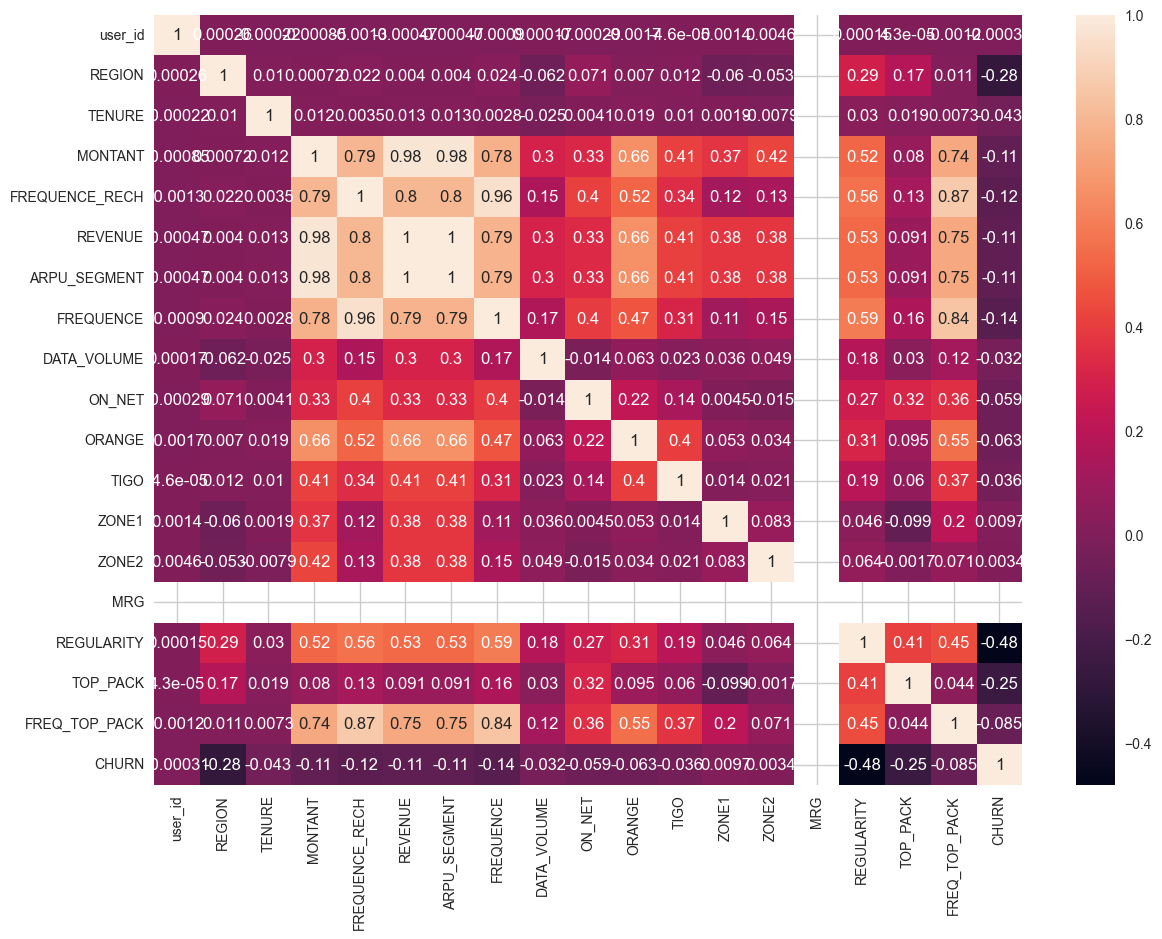

In [79]:
correlations = df1.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlations , annot = True)

In [80]:
df1 = df1.drop(columns=['ARPU_SEGMENT', 'user_id'])

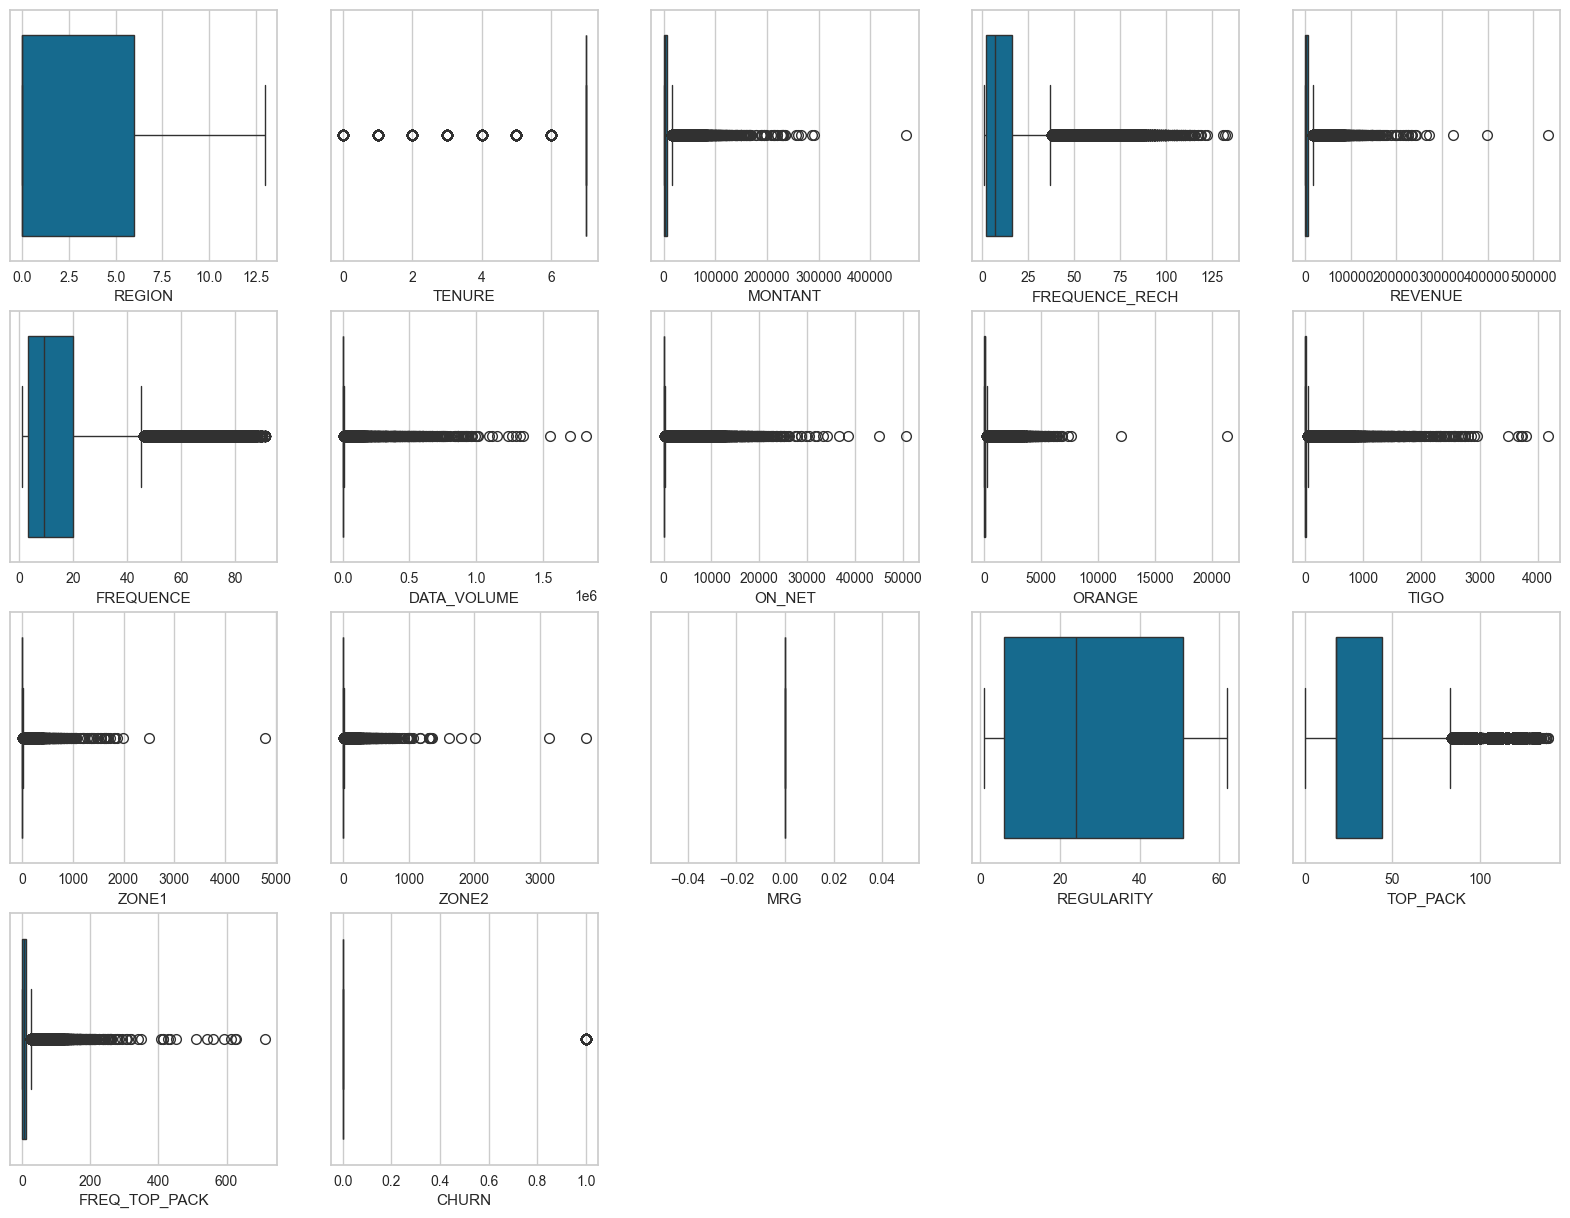

In [81]:
def box_plots(df) :
    plt.figure(figsize=(20,15))
    for i , column in enumerate(df.columns) :
        ax = plt.subplot(len(df.columns) // 5 +1 , 5 , i+1)
        sns.boxplot(data = df , x=column , ax= ax )
        ax.set_xlabel(column)
    plt.show()

box_plots(df1)

In [82]:
df2= df1.copy()

In [83]:
def removing_outliers(df , column_name) :
    Q1 = df[column_name].quantile(0.25)
    Q3 = df [column_name].quantile(0.75)
    IQR = Q3-Q1
    min_boundry = Q1 - 1.5*IQR
    max_boundry = Q3 + 1.5*IQR
    return min_boundry , max_boundry

for column in df2.columns :
    minimum_boundry, maximum_boundry = removing_outliers(df2 , column)
    df2 = df2[(df2[column] >= minimum_boundry) & (df2[column] <= maximum_boundry)]


In [84]:
x= df1.drop(columns='CHURN')
y = df1['CHURN']


In [85]:
scaler = StandardScaler()
df1 = scaler.fit_transform(x)

In [86]:
df1 = pd. DataFrame(x , columns=['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'FREQUENCE', 'DATA_VOLUME',
                                   'ON_NET', 'ORANGE', 'TIGO', 'ZONEI', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK'] )

In [87]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.2 , random_state= 42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((430809, 16), (1723239, 16), (430809,), (1723239,))

In [88]:
x_train

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
305977,0,7,9100.0,16.0,9598.0,22.0,5112.0,8.0,15.0,2.0,NaN,16.0,0,37,44,6.0
1865959,4,5,1000.0,2.0,1000.0,2.0,0.0,47.0,3.0,NaN,NaN,NaN,0,27,96,1.0
970705,0,7,13300.0,40.0,14300.0,43.0,3729.0,103.0,176.0,178.0,NaN,NaN,0,62,107,26.0
704874,4,7,1500.0,3.0,1492.0,5.0,2519.0,8.0,NaN,NaN,NaN,NaN,0,26,44,2.0
2007649,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003274,0,7,1700.0,8.0,1700.0,9.0,NaN,414.0,37.0,27.0,NaN,NaN,0,47,107,7.0
1570006,11,7,2500.0,5.0,2500.0,5.0,0.0,26.0,140.0,3.0,NaN,NaN,0,8,84,2.0
732180,0,7,7100.0,16.0,7099.0,19.0,182.0,128.0,54.0,8.0,NaN,NaN,0,55,16,11.0
110268,0,7,NaN,NaN,235.0,11.0,0.0,0.0,1.0,NaN,NaN,1.0,0,12,18,NaN


In [89]:
# logistic_reg = LogisticRegression(max_iter=1000)
# logistic_reg.fit(x_train , y_train)

In [90]:
# y_pred=logistic_reg.predict(x_test)

In [91]:
# accuracy = accuracy_score(y_test , y_pred)
# accuracy

In [92]:
decision_tree = DecisionTreeClassifier(max_depth= 4)
decision_tree. fit(x_train , y_train)

DecisionTreeClassifier(max_depth=4)

In [93]:
y_pred =decision_tree.predict(x_test)

In [94]:
random_forest = RandomForestClassifier(n_estimators= 20)
random_forest.fit(x_train , y_train)

RandomForestClassifier(n_estimators=20)

In [95]:
y_pred = random_forest.predict(x_test)

In [96]:
RF_accuracy = accuracy_score(y_test , y_pred)
RF_accuracy

0.8685046009288323

In [97]:
y_pred = random_forest.predict(x_test)

In [98]:
RF_accuracy - accuracy_score(y_test , y_pred)
RF_accuracy

0.8685046009288323

In [99]:
# knn = KNeighborsClassifier(n_neighbors= 10 , n_jobs= -1)
# knn.fit(x_train , y_train)

In [100]:
# y_pred =knn.predict(x_test)

In [101]:
# knn_accuracy = accuracy_score(y_test , y_pred)

In [102]:
joblib.dump(decision_tree , 'decision_tree.pkl')

['decision_tree.pkl']